model_training

model_training

In [3]:
from tqdm import tqdm
import sys
from sklearn.model_selection import train_test_split
from torch.utils.data import (
    DataLoader, Dataset, RandomSampler, SubsetRandomSampler, Subset, SequentialSampler
)
from MTGNet import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from search import *
import matplotlib.pyplot as plt
import torch
import numpy as np
import copy
import random
import argparse
import pickle
from util import *
# Multitask performance
# Gain distribution
# Estimation Error

/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
# search for multiple
dataset = 'mimic27'
import pickle
with open('./example_log/mimic27/pred_pertask_trajactiveper_1e-05_22_2_39.pkl', "rb") as fp:
    # pred_traj1e-05_2_13 pertasks pertask ->
# with open('./log/27tasksaddpair/'+ratio+'/pred_pertask_traj_1e-05_22_'+str(num_layers)+'_39.pkl', "rb") as fp: 
    pred_traj = pickle.load(fp)
select_index = []
pred_traj = np.array(pred_traj)[[27,31,35,-1]]
x,y,testx,testy = getdataset('27tasksaddpair',ratio)
validy = y
validx = x
HOApath = '../gain_collection/collected_gain/ETT/mimic_HOA.csv'
TAGpath = '../gain_collection/collected_gain/ETT/mimic_TAGHOA.csv'
sample_num = 3000
search_num = 5
total_gain_traj,total_select = approx_optimal(sample_num,search_num,pred_traj,testy,testx,dataset)
total_HOA_gain_traj,HOA_select = approx_optimal(sample_num,search_num,pd.read_csv(HOApath,header= None , sep=' ').values,testy,testx,dataset)
oracle_gain_traj,oracel_select = approx_optimal(sample_num,search_num,validy,testy,testx,dataset)
test_oracle_traj,oracel_select = approx_optimal(sample_num,search_num,testy,testy,testx,dataset)
TAG_gain_traj,TAG_select = approx_optimal(sample_num,search_num,pd.read_csv(TAGpath,header= None , sep=' ').values,testy,testx,dataset)

sample_num = 26
search_num = 1
budget = 27
# list26 = []
x,y,testx,testy = getdataset('27tasksaddpair')
gain_1 = []
gain_6 = []
total_traj = []
for iteration in range(100):
    # print(iteration)
    rand_traj = []
    for num in range(1,27):
        while(True):
            sample_list = np.random.choice(np.arange(len(x)) ,size = num,replace = False )
            a = np.zeros((len(x[0])),)
            for i in x[sample_list]:
                a = a+i
            if(len(a[a==0])==0 ):
                value = np.zeros((len(x[0])))
                selected = validy[sample_list]
                test = testy[sample_list]
                testmask = testx[sample_list]
                for i in range(len(y[0])):
                    value[i] = test[np.argmax(selected[:,i])][i]
                break
        rand_traj.append(value.sum())
    total_traj.append(np.array(rand_traj))
for i in range(20):
    while(True):
        sample_list = np.random.choice(np.arange(len(x)) ,size = budget*5,replace = False )
        a = np.zeros((len(x[0])),)
        for i in x[sample_list]:
            a = a+i
        if(len(a[a==0])==0 ):
            selected = validy[sample_list]
            test = testy[sample_list]
            testmask = testx[sample_list]
            # for i in range(len(y[0])):
            #     a[i] = test[np.argmax(selected[:,i])][i]
        break
    random_gain_traj6,random_select = approx_optimal(sample_num,search_num,selected,test,testmask,dataset)
    while(True):
        sample_list = np.random.choice(np.arange(len(x)) ,size = budget,replace = False )
        a = np.zeros((len(x[0])),)
        for i in x[sample_list]:
            a = a+i
        if(len(a[a==0])==0 ):
            selected = validy[sample_list]
            test = testy[sample_list]
            testmask = testx[sample_list]
            # for i in range(len(y[0])):
            #     a[i] = test[np.argmax(selected[:,i])][i]
        break
    random_gain_traj,random_select = approx_optimal(sample_num,search_num,selected,test,testmask,dataset)
    gain_6.append(random_gain_traj6)
    gain_1.append(random_gain_traj)

for m in range(len(total_gain_traj)):
    for n in range(len(total_gain_traj[0])):
        if(total_gain_traj[m][n] > total_gain_traj[-1][n]):
            total_gain_traj[m][n] = total_gain_traj[-1][n]
# oracel_valid_gain_traj = approx_optimal(sample_num,search_num,testy,ground_truth,ground_truth_mask,dataset,testx)
# total_TAG_gain_traj = approx_optimal(sample_num,search_num,pd.read_csv(TAGpath,header= None , sep=' ').values,ground_truth,ground_truth_mask,dataset)

NameError: name 'ratio' is not defined

In [3]:
with open('./log/27tasksaddpair/'+ratio+'/pred_pertask_trajactiveper_1e-05_22_2_39.pkl', "rb") as fp:
    pred_traj = pickle.load(fp)
model_pred = np.array(pred_traj)[[27,-1]]

/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f22878741d0> has a label of '_' which cannot be automatically added to the legend.
/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f2287874c88> has a label of '_' which cannot be automatically added to the legend.
/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f22878745f8> has a label of '_' which cannot be automatically added to the legend.
/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f2287874630> has a label of '_' which cannot be automatically added to the legend.
/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipyker

load 27tasksaddpair


/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


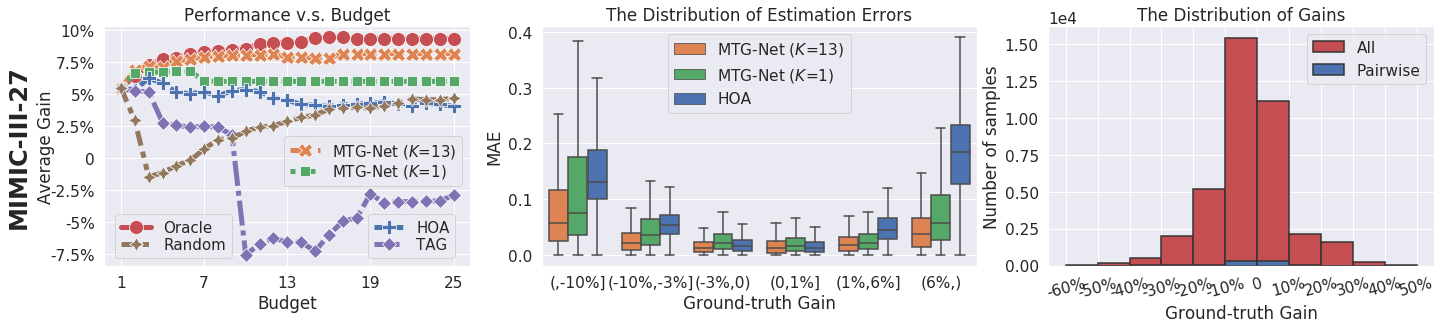

In [10]:
# plt.switch_backend('agg')
# plt.rcParams['pdf.use14corefonts'] = True
import matplotlib
%matplotlib inline
cut_length = 25
NN_gain = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(total_gain_traj[2])[:cut_length]/27 })
NN_gain1 = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(total_gain_traj[0])[:cut_length]/27 })
rand_group = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(total_traj).mean(0)[:cut_length]/27 })
HOA_gain = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(total_HOA_gain_traj)[:cut_length]/27 })
oracle_gain = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(oracle_gain_traj)[:cut_length]/27 })
test_oracle = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(test_oracle_traj)[:cut_length]/27 })
random_gain1 = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(gain_1).mean(0)[:cut_length]/27 })
random_gain5 = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(gain_6).mean(0)[:cut_length]/27 })
TAG_gain = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(TAG_gain_traj)[:cut_length]/27 })
HOA_gain['type'] = 'HOA'
NN_gain['type'] = 'MTG-Net ($K$=13)'
NN_gain1['type'] = 'MTG-Net ($K$=1)'
oracle_gain['type'] = 'Oracle'
test_oracle['type'] = 'Test orcale'
TAG_gain['type'] = 'TAG'
rand_group['type'] = 'Random'
random_gain1['type'] = '(strong) random gain 27 sample'
random_gain5['type'] = '(strong) random gain 27*5 sample'
import seaborn as sns
all_gain = pd.concat([oracle_gain,NN_gain,NN_gain1,HOA_gain,TAG_gain,rand_group],axis=0)
gs = gridspec.GridSpec(2, 140)
plt.figure(figsize=(24.9,4.4))
ax_title = plt.subplot(gs[:,:6])
ax_title.grid(False)
ax_title.set_facecolor('white')
ax_title.set_xticklabels([])
ax_title.set_ylabel('MIMIC-III-27',fontsize=24,fontweight="bold")
ax_title.set_yticklabels([])
ax1 = plt.subplot(gs[:,6:43])
sns.set(font_scale=1.4)
mypalette = [sns.color_palette()[3],sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[0],sns.color_palette()[4],sns.color_palette()[5]]
sns.lineplot(x="budget", y="gain",hue="type",style='type', markers=True,linewidth = 5,markersize=14,palette=mypalette, data=all_gain, ax = ax1,ci=0,markevery=1)
plt.ylabel('Average Gain',labelpad=-5)
ax1.set_xticks([1,7,13,19,25])
ax1.set_yticks([-0.075,-0.05,-0.025,0,0.025,0.05,0.075,0.10])
ax1.set_yticklabels(['-7.5%','-5%','-2.5%','0','2.5%','5%','7.5%','10%',])
ax1.set_xlabel('Budget')
l1 = ax1.legend(['Oracle','_','_','_','_','Random'],ncol = 1,loc='lower left',bbox_to_anchor=(0.01,0.00),fontsize=15,columnspacing=0.15,labelspacing=0.15)
l2 = ax1.legend(['_','_','_','HOA','TAG','_'],ncol = 1,loc='lower left',bbox_to_anchor=(0.7,0.00),fontsize=15,columnspacing=0.15,labelspacing=0.15)
ax1.add_artist(l1)
ax1.add_artist(l2)
ax1.legend(['_','MTG-Net ($K$=13)','MTG-Net ($K$=1)'],ncol = 1,loc='lower left',bbox_to_anchor=(0.47,0.3),fontsize=15,columnspacing=0.15,labelspacing=0.15)
# ax1.add_artist(l2)
plt.title("Performance v.s. Budget")
ax2 = plt.subplot(gs[:,101:147])
plt.title('The Distribution of Gains')
x,y,testx,testy = getdataset('27tasksaddpair',ratio)
HOA = pd.read_csv(HOApath,header= None , sep=' ').values
import copy
y_n2 = y
P_n2 = HOA
ground_truth = y
range0 = np.percentile(y[y<0],0)
range1 = np.percentile(y[y<0],33)
range2 = np.percentile(y[y<0],66)
range3 = 0
range4 = np.percentile(y[y>0],33)
range5 = np.percentile(y[y>0],66)
range6 = np.percentile(y[y>0],100)
boxplot_x = np.array([range0,range1,range2,range3,range4,range5,range6])
name_list = ['(,-10%]','(-10%,-3%]','(-3%,0)','(0,1%]','(1%,6%]','(6%,)']
num_list = np.array([0.00,0.005,0.01,0.015])
total_width, n = 0.001, 2
width = total_width
num_list1 = num_list- width
bin_sel = np.array(list(range(-600,600,100)))*0.001
total_output = copy.deepcopy(model_pred[-1])
total_output[total_output==-99] = 0
name_list = ['-60%','-50%','-40%','-30%','-20%','-10%','0','10%','20%','30%','40%','50%']
plt.xticks(bin_sel,name_list)
plt.hist(y[y!=0], bins=bin_sel, normed=0, color=sns.color_palette()[3],linewidth=1.5,edgecolor =(0.2,0.2,0.2),label='All', alpha=1)
plt.hist(y[2843:][y[2843:]!=0], bins=bin_sel, normed=0, color=sns.color_palette()[0],linewidth=1.5,edgecolor =(0.2,0.2,0.2),label='Pairwise', alpha=1)
plt.xticks(rotation=15)
ax2.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
plt.legend()
plt.xlabel('Ground-truth Gain')
plt.ylabel('Number of samples')

name_list = ['(,-10%]','(-10%,-3%]','(-3%,0)','(0,1%]','(1%,6%]','(6%,)']

average_boxplot= []
total_output = copy.deepcopy(model_pred)[-1]
for i in range(len(boxplot_x)-1):
    average_boxplot.append(abs(P_n2[((y_n2>boxplot_x[i]) & (y_n2<boxplot_x[i+1]))] - y_n2[((y_n2>boxplot_x[i]) & (y_n2<boxplot_x[i+1]))] ))
NN_boxplot = []
for i in range(len(boxplot_x)-1):
    NN_boxplot.append(abs(total_output[((ground_truth>boxplot_x[i]) & (ground_truth<boxplot_x[i+1]))] - ground_truth[((ground_truth>boxplot_x[i]) & (ground_truth<boxplot_x[i+1]))] ))
import pandas as pd
df_average = pd.DataFrame(columns=['type','MAE','Range'])
for i in range(len(name_list)):
    data = {'type':'HOA',
            'MAE':average_boxplot[i],
            'Range':name_list[i]}
    df_average = pd.concat([df_average,pd.DataFrame(data)],axis=0)

import pandas as pd
df_NN1 = pd.DataFrame(columns=['type','MAE','Range'])
for i in range(len(name_list)):
    data = {'type':'MTG-Net ($K$=13)',
            'MAE':NN_boxplot[i],
            'Range':name_list[i]}
    df_NN1 = pd.concat([df_NN1,pd.DataFrame(data)],axis=0)

total_output = copy.deepcopy(model_pred[-2])
NN_boxplot = []
for i in range(len(boxplot_x)-1):
    NN_boxplot.append(abs(total_output[((ground_truth>boxplot_x[i]) & (ground_truth<boxplot_x[i+1]))] - ground_truth[((ground_truth>boxplot_x[i]) & (ground_truth<boxplot_x[i+1]))] ))
import pandas as pd
df_NN2 = pd.DataFrame(columns=['type','MAE','Range'])
for i in range(len(name_list)):
    data = {'type':'MTG-Net ($K$=1)',
            'MAE':NN_boxplot[i],
            'Range':name_list[i]}
    df_NN2 = pd.concat([df_NN2,pd.DataFrame(data)],axis=0)

all_average = pd.concat([df_NN1,df_NN2,df_average],axis=0)
ax3 = plt.subplot(gs[:,50:94])
sns.boxplot(x="Range", y="MAE",
                hue="type", palette= (sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[0]),
                data=all_average,showfliers = False,saturation=1 )
                # ,
                # ax=ax3
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles=handles[0:], labels=labels[0:])
plt.xlabel('Ground-truth Gain')
plt.title('The Distribution of Estimation Errors')
# plt.tight_layout()
plt.show(block=True)